In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path="C:/Users/VenkatBhaskar/Downloads/k-means_question_sample_data.csv"
df=pd.read_csv(path,header=None)

In [3]:
df

,0,1,2
0,-4.13682,8.791720,-0.728515
1,-5.48328,9.349850,-0.673607
2,-5.04319,9.616590,-0.209287
3,2.25434,7.202140,-5.705060
4,-3.12369,-5.254930,-8.135030
...,...,...,...
95,-8.46011,-0.561695,1.257810
96,-3.26345,-5.634070,-8.085580
97,-8.57225,-0.342057,1.158380
98,-3.32163,-4.548770,-8.939630


In [4]:
df.max().max()

10.1934

In [5]:
def euclidean(a,b):
    error = np.square(np.sum((a-b)**2))
    return error

In [6]:
def initialize_centroids(k, data):

    n_dims = data.shape[1]
    centroid_min = data.min().min()
    centroid_max = data.max().max()
    centroids = []

    for centroid in range(k):
        centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
        centroids.append(centroid)

    centroids = pd.DataFrame(centroids, columns = data.columns)

    return centroids

centroids = initialize_centroids(3, df)
centroids

,0,1,2
0,9.219668,-1.875781,5.156605
1,-9.892219,9.171810,4.099144
2,6.367318,0.960659,9.532520


In [7]:
errors = np.array([])
for centroid in range(centroids.shape[0]):
    error = euclidean(centroids.iloc[centroid, :2], df.iloc[0,:2])
    errors = np.append(errors, error)

errors

array([85375.78357881,  1106.83230923, 29467.98865095])

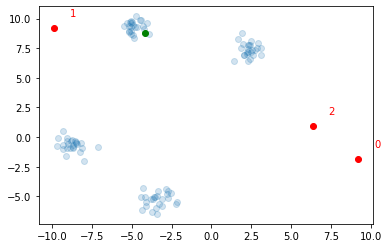

In [8]:
plt.scatter(df.iloc[1:,0], df.iloc[1:,1],  marker = 'o', alpha = 0.2)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', c = 'r')
plt.scatter(df.iloc[0,0], df.iloc[0,1],  marker = 'o', c = 'g')
for i in range(centroids.shape[0]):
    plt.text(centroids.iloc[i,0]+1, centroids.iloc[i,1]+1, s = centroids.index[i], c = 'r')

In [9]:
np.where(errors == np.amin(errors))[0].tolist()[0]

1

In [10]:
def assign_centroid(data, centroids):
    '''
    Receives a dataframe of data and centroids and returns a list assigning each observation a centroid.
    data: a dataframe with all data that will be used.
    centroids: a dataframe with the centroids. For assignment the index will be used.
    '''

    n_observations = data.shape[0]
    centroid_assign = []
    centroid_errors = []
    k = centroids.shape[0]


    for observation in range(n_observations):

        # Calculate the errror
        errors = np.array([])
        for centroid in range(k):
            error = euclidean(centroids.iloc[centroid, :2], data.iloc[observation,:2])
            errors = np.append(errors, error)

        # Calculate closest centroid & error 
        closest_centroid =  np.where(errors == np.amin(errors))[0].tolist()[0]
        centroid_error = np.amin(errors)

        # Assign values to lists
        centroid_assign.append(closest_centroid)
        centroid_errors.append(centroid_error)

    return (centroid_assign,centroid_errors)

df['centroid'], df['error'] = assign_centroid(df.iloc[:,:3] ,centroids)
df[['centroid', 'error']].head()

,centroid,error
0,1,1106.832309
1,1,379.098186
2,1,562.207458
3,2,3121.755191
4,2,16566.980224


In [11]:
df

,0,1,2,centroid,error
0,-4.13682,8.791720,-0.728515,1,1106.832309
1,-5.48328,9.349850,-0.673607,1,379.098186
2,-5.04319,9.616590,-0.209287,1,562.207458
3,2.25434,7.202140,-5.705060,2,3121.755191
4,-3.12369,-5.254930,-8.135030,2,16566.980224
...,...,...,...,...,...
95,-8.46011,-0.561695,1.257810,1,9368.702191
96,-3.26345,-5.634070,-8.085580,2,18561.922201
97,-8.57225,-0.342057,1.158380,1,8511.166596
98,-3.32163,-4.548770,-8.939630,2,15432.974456


In [12]:
df['error'].sum()

810836.3786873767

In [18]:
centroids = df.groupby('centroid').agg('mean').iloc[:,:3].reset_index(drop = True)
centroids

,0,1,2
0,-6.775464,4.311782,0.323909
1,-0.517931,1.055338,-7.410915


In [16]:
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

TypeError: '[0, 1, 2]' is an invalid key

0     8.791720
1     9.349850
2     9.616590
3     7.202140
4    -5.254930
        ...   
95   -0.561695
96   -5.634070
97   -0.342057
98   -4.548770
99   -5.251670
Name: 1, Length: 100, dtype: float64